In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
if os.path.exists('/kaggle/working/submission.csv'):
    os.remove('/kaggle/working/submission.csv')
    print("File deleted.")
else:
    print("File not found.")

File not found.


import zipfile

zip_path = "/kaggle/input/quora-question-pairs/train.csv.zip"
extract_path = "/kaggle/working/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
df.shape

(404290, 6)

In [4]:
df = df.sample(30000)

In [5]:
df.info

<bound method DataFrame.info of             id    qid1    qid2  \
105939  105939  174595  174596   
172395  172395  266177  266178   
111387  111387  182462  182463   
201367  201367  196175   52820   
130305  130305  209147  209148   
...        ...     ...     ...   
239538  239538  351140  351141   
375842  375842  506914  506915   
377805  377805  509141  509142   
228520  228520   71210   17683   
123287  123287  199366  199367   

                                                question1  \
105939  What education is needed to become an ethical ...   
172395                 How is Rahul Dravid off the field?   
111387  Will it be a problem while applying for my pas...   
201367  What are best websites to learn programming co...   
130305  What is the world rank of Shri ram college of ...   
...                                                   ...   
239538  What would Steve Jobs say if he is alive today...   
375842  What are the advantages and disadvantages of I...   
377805  Do

In [6]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
df['is_duplicate'].value_counts()

is_duplicate
0    19000
1    11000
Name: count, dtype: int64

In [9]:
df['is_duplicate'].count()

30000

Text(0, 0.5, 'Frequency')

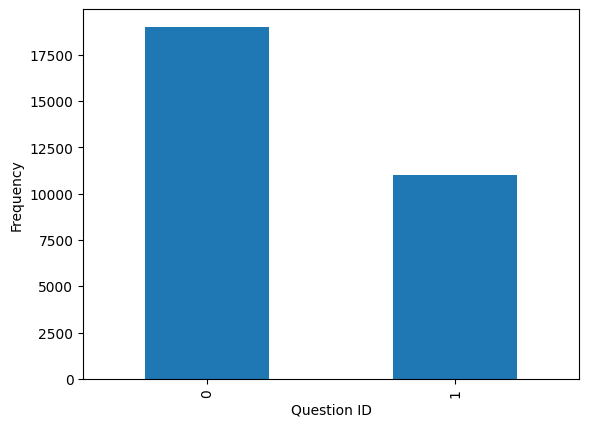

In [10]:
import matplotlib.pyplot as plt
df['is_duplicate'].value_counts().plot(kind='bar')
plt.xlabel("Question ID")
plt.ylabel("Frequency")

In [11]:
# Unique questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f'Number of unique questions {np.unique(qid).shape[0]}')

# Repeted questions
x = qid.value_counts()>1
print(f'Number of questions repeated {x[x].shape[0]}')


Number of unique questions 55513
Number of questions repeated 3363


In [12]:
qid.value_counts().values

array([11,  8,  7, ...,  1,  1,  1])

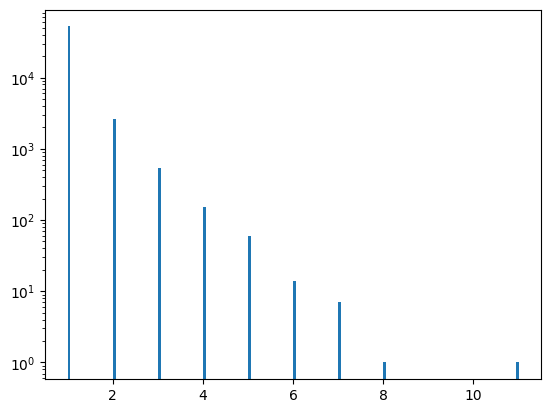

In [13]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

qid1 , qid2, question1, question2, is_duplicate <br>
              bow        bow        randomforest

In [14]:
# Feature engineering

In [15]:
ques_df = df[['question1','question2']]
ques_df.head()


,question1,question2
105939,What education is needed to become an ethical ...,What are the major steps to learn about ethica...
172395,How is Rahul Dravid off the field?,What are some of the great innings of Rahul Dr...
111387,Will it be a problem while applying for my pas...,Can my mom come abroad with me or it will crea...
201367,What are best websites to learn programming co...,What's the best website to learn extensive pro...
130305,What is the world rank of Shri ram college of ...,Does Shri Ram College of Commerce offer both 3...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Merge all questions into one list
questions = list(ques_df['question1'].fillna("")) + list(ques_df['question2'].fillna(""))

# Vectorize
cv = CountVectorizer(max_features=3000)
q_vectors = cv.fit_transform(questions).toarray()

# Split back into q1 and q2 arrays
half = len(q_vectors) // 2
q1_arr, q2_arr = np.vsplit(q_vectors, [half])

In [17]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)

temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
105939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
105939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# EDA


### Data Preprocessing & Transformation


In [20]:
temp_df.iloc[:,0:-1].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
#importing and splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2, random_state=2)



### Model Selection & Evaluation

### Classification Models / Regression Models

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7456666666666667

In [24]:
#Random Forest Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7383333333333333

In [26]:
test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')
print(test_df.shape)

test_df = test_df.sample(2345796)
print(test_df.shape)

/tmp/ipykernel_13/2024445107.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')


(3563475, 3)
(2345796, 3)


In [27]:
from scipy.sparse import vstack, hstack

# Vectorize test questions (keep sparse!)
test_questions = list(test_df['question1'].fillna('')) + list(test_df['question2'].fillna(''))
test_vectors = cv.transform(test_questions)  # DO NOT call .toarray()

# Split into two sparse matrices
q1_test, q2_test = test_vectors[:len(test_df)], test_vectors[len(test_df):]

# Horizontally stack the sparse matrices
X_test = hstack([q1_test, q2_test])

In [28]:
# Predict on the Kaggle test set
y_pred = model.predict(X_test)
print("Predictions shape:", y_pred.shape)


Predictions shape: (2345796,)


In [29]:
submission = pd.DataFrame({
    'test_id': test_df['test_id'],    
    'is_duplicate': y_pred
})

submission.to_csv('submission.csv', index=False)

### Model Evaluation Metrics

### Pipelines